<h1><center>CSCI - 6409 - The Process of Data Science - Summer 2022</h1>
    <h1><center>Fraud Detection on Banking Payments</h1>

        
<b>Sagar Devesh</b>  
<b>(B00905507) </b>
        
<b>Sarthak Pandit</b>  
<b>(B00900388) </b>









# Data understanding and feature engineering

## Data Analysis and Quality Report


Adding the below snippet to avoid future warnings in the result snippets

In [ ]:
# import warnings filter
from warnings import simplefilter
import warnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings 
warnings.filterwarnings('ignore')

Importing essential libraries required


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt
import matplotlib.ticker as mtick 

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

Read the Bank Payments dataset [1]


In [ ]:
 fraud = pd.read_csv('fraud_data.csv')

Looking at the datset records

In [ ]:
fraud.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


Get Details of the data types and the columns present in the dataset

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


Describing the Data frame to visualize all the features and their value ranges

In [ ]:
fraud.describe(include="all")

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,1,50,1,15,NaN,NaN
top,NaN,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',NaN,NaN
freq,NaN,265,187310,324565,594643,299693,594643,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


Printing first row


In [ ]:
fraud.iloc[0]

step                             0
customer             'C1093826151'
age                            '4'
gender                         'M'
zipcodeOri                 '28007'
merchant              'M348934600'
zipMerchant                '28007'
category       'es_transportation'
amount                        4.55
fraud                            0
Name: 0, dtype: object

Convert datatypes from object to its actual data type

In [ ]:
fraud = fraud.convert_dtypes()
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  Int64  
 1   customer     594643 non-null  string 
 2   age          594643 non-null  string 
 3   gender       594643 non-null  string 
 4   zipcodeOri   594643 non-null  string 
 5   merchant     594643 non-null  string 
 6   zipMerchant  594643 non-null  string 
 7   category     594643 non-null  string 
 8   amount       594643 non-null  Float64
 9   fraud        594643 non-null  Int64  
dtypes: Float64(1), Int64(2), string(7)
memory usage: 47.1 MB


Analysing the Null values in the dataset

In [ ]:
fraud.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

#### Get Unique values for each column

In [ ]:
fraud['step'].unique()

<IntegerArray>
[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
 ...
 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
Length: 180, dtype: Int64

In [ ]:
fraud['age'].unique()

<StringArray>
["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"]
Length: 8, dtype: string

In [ ]:
fraud['fraud'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [ ]:
fraud['gender'].unique()

<StringArray>
["'M'", "'F'", "'E'", "'U'"]
Length: 4, dtype: string

In [ ]:
fraud['amount'].unique()

<FloatingArray>
[  4.55,  39.68,  26.89,  17.25,  35.72,  25.81,    9.1,  21.17,   32.4,
   35.4,
 ...
 163.55, 521.84, 187.56, 178.08, 102.04, 164.39, 181.16, 249.18, 224.81,
 190.31]
Length: 23767, dtype: Float64

### Continous features report

Continuous features report includes:
1. Min
2. 1st quartile
3. Mean
4. 2nd quartile - Median
5. 3rd quartile
6. Max
7. Standard deviation
8. Total num of instances
9. % missing values
10. Cardinality - num of distinct values for a feature

Using Pandas provides a function for generating data quality reports however it doesn't include all the statistics.

In [ ]:
fraud.describe(include=['number'])

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [ ]:
import warnings
def build_continuous_features_report(telecom):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = telecom.select_dtypes("number").columns
    continuous_data_df = telecom[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
build_continuous_features_report(fraud)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
step,594643,0.0,180,0.0,52.0,94.986827,97.0,139.0,179.00,51.053632
amount,594643,0.0,23767,0.0,13.74,37.890135,26.9,42.54,8329.96,111.402831
fraud,594643,0.0,2,0.0,0.0,0.012108,0.0,0.0,1.00,0.109369


### Visualizing Continous features

Step


Insights : 

Text(0.5, 1.0, 'Step Distribution')

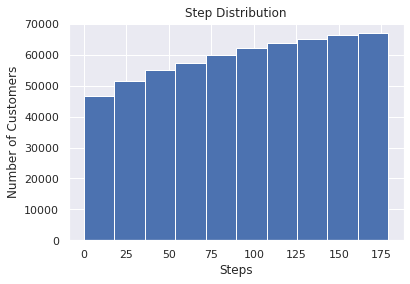

In [ ]:
import matplotlib.pyplot as plt

Step =fraud['step'].dropna()

plt.hist(Step)

plt.xlabel('Steps')

plt.ylabel('Number of Customers')

plt.title('Step Distribution')

#### Transaction Amount


Most of the transaction amounts are below 1000 $. hence we need a different way to visualize and understand the data related to amount

Text(0.5, 1.0, 'Transaction Amount Distribution')

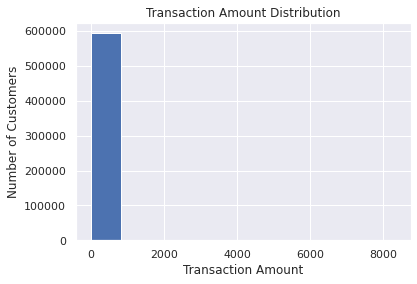

In [ ]:
import matplotlib.pyplot as plt
amount = fraud['amount']
plt.hist(amount)
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Customers')
plt.title('Transaction Amount Distribution')

Binning of Data: We have created bins of 0-100, 100-500, 500-1000, 1000-8400 for the purpose of getting a better idea about the data. For creating bins we have converted continous data into categorical 


In [ ]:
fraud['amount_bins'] =pd.cut(fraud['amount'],bins=[0,100,500,1000,8400],labels=['0-100','100-500','500-1000','1000-8400'])

In [ ]:
fraud['amount_bins'].unique()

['0-100', '100-500', '500-1000', '1000-8400', NaN]
Categories (4, object): ['0-100' < '100-500' < '500-1000' < '1000-8400']

**Insight**: Maximum transactions have amout in the range 0-100$

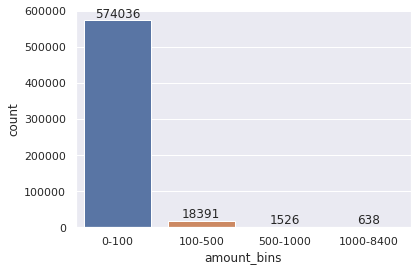

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=fraud['amount_bins'],
                   order=fraud['amount_bins'].value_counts(ascending=False).index);

abs_values = fraud['amount_bins'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

In [ ]:
fraud_amount = fraud.groupby(['amount_bins','fraud']).size().unstack()
fraud_amount

fraud,0,1
amount_bins,,
0-100,572897,1139
100-500,14406,3985
500-1000,57,1469
1000-8400,31,607


**Insight** : Maximum fraud transactions occur when the transaction amounts are high (>500 $)

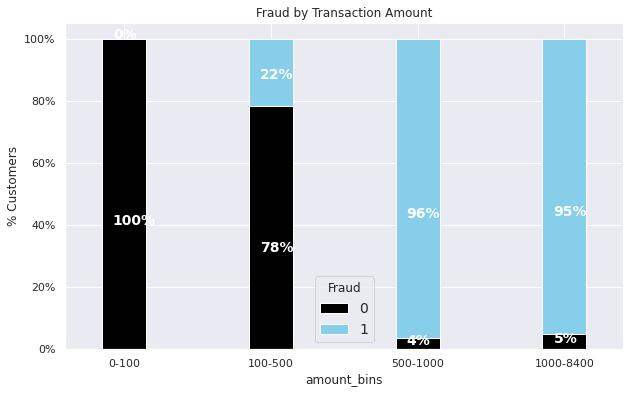

In [ ]:
ax = (fraud_amount.T*100.0 / fraud_amount.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = ['#000000','#87CEEB'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Fraud')
ax.set_ylabel('% Customers')
ax.set_title('Fraud by Transaction Amount')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Data Quality Issues [6]

The following data quality issues were identified 


1. Most of the features have ' ' in the values, we need to remove that to use the categorical features for analysis
2. There are no null values present in the dataset
3. The target feature 'fraud' is skewed, 98.79% of transactions are not fraud, which could create a bias while training the data

**Preprocessing to remove the data quality issues**

1. Removing the ' ' in the columns which contain this notation to prevent it from hindering our analysis
2. Applying SMOTE (Synthetic Minority Oversampling Technique) to oversample the data,so that our dataset doesn't remain unbalanced. 

Columns except Step, amount, amount_bins and fraud have quotes with them, we need to clean them by removing them 


In [ ]:
cols_to_be_updated = [c for c in fraud.columns if c not in ['step', 'amount', 'fraud','amount_bins']]
cols_to_be_updated

['customer',
 'age',
 'gender',
 'zipcodeOri',
 'merchant',
 'zipMerchant',
 'category']

In [ ]:
fraud[cols_to_be_updated] = fraud[cols_to_be_updated].applymap(lambda x: x.replace("'", ""))

### Categorical features report

Categorical features report includes:
1. Mode - the most frequent value
2. 2nd mode - the second most frequent value
3. Frequency of mode
4. Proportion of mode in the dataset
5. Frequency of 2nd mode
6. Proportion of 2nd mode in the dataset
7. % missing values
8. Cardinality

Pandas provides a function for generating data quality reports however it doesn't include all the statistics.

In [ ]:
fraud.describe(exclude=['number'])

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount_bins
count,594643,594643,594643,594643,594643,594643,594643,594591
unique,4112,8,4,1,50,1,15,4
top,C1978250683,2,F,28007,M1823072687,28007,es_transportation,0-100
freq,265,187310,324565,594643,299693,594643,505119,574036


In [ ]:
def build_categorical_features_report(fraud):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = fraud.select_dtypes(exclude="number").columns
    continuous_data_df = fraud[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [ ]:
build_categorical_features_report(fraud)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
customer,594643,0.000000,4112,C1978250683,265,0.044565,[C1275518867],252,0.042378
age,594643,0.000000,8,2,187310,31.499572,[3],147131,24.742745
gender,594643,0.000000,4,F,324565,54.581488,[M],268385,45.133803
zipcodeOri,594643,0.000000,1,28007,594643,100.000000,[],0,0.000000
merchant,594643,0.000000,50,M1823072687,299693,50.398811,[M348934600],205426,34.546106
zipMerchant,594643,0.000000,1,28007,594643,100.000000,[],0,0.000000
category,594643,0.000000,15,es_transportation,505119,84.944917,[es_food],26254,4.415086
amount_bins,594643,0.008745,4,0-100,574036,96.534559,[100-500],18391,3.092780


### Visualizing Categorical features

##### AGE

Age: Categorized age
0: <= 18,

*   1: 19-25,
* 2: 26-35,
* 3: 36-45,
* 4: 46:55,
* 5: 56:65,
* 6: > 65
* U: Unknown

**Insight** : Most of the transactions are for the age bucket -2 "26-35 years"


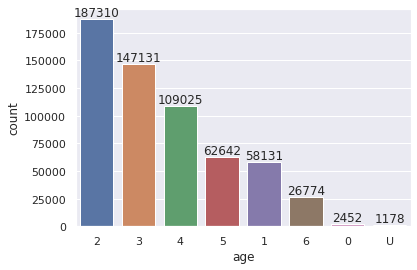

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=fraud['age'],
                   order=fraud['age'].value_counts(ascending=False).index);

abs_values = fraud['age'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

Fucntion for Countplot Visaulization

In [ ]:
##  Function definition for Countplot
def countplot_viz(data: pd.DataFrame, col: str, title: str = None, hue: str = None):
    plt.figure(figsize = (16, 12))
    plt.title(title)
    ax = sns.countplot(data = data, x = col, order = data[col].value_counts().index,
                       hue = hue if hue else None)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(data[col]), 2)}%",
                ha = 'center')
    if data[col].nunique() > 5:
        plt.xticks(rotation = 45)
        plt.figsize(3, 3)
    plt.show()

##### Gender

54% of the transactions are by Female Population and 45% by Men 

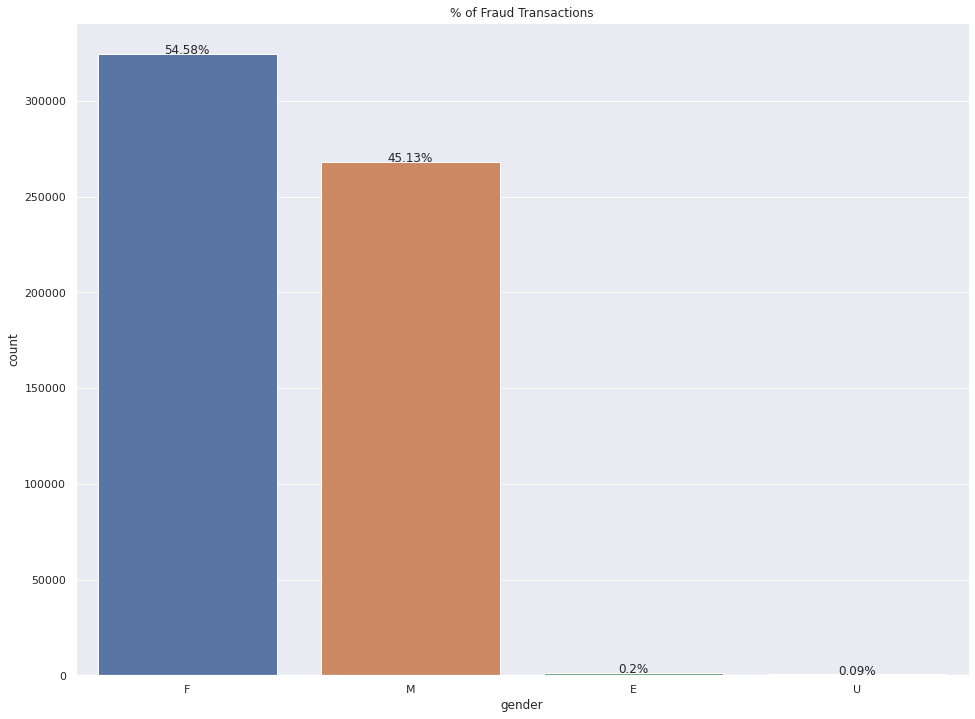

In [ ]:
countplot_viz(fraud, 'gender', title = '% of Fraud Transactions')

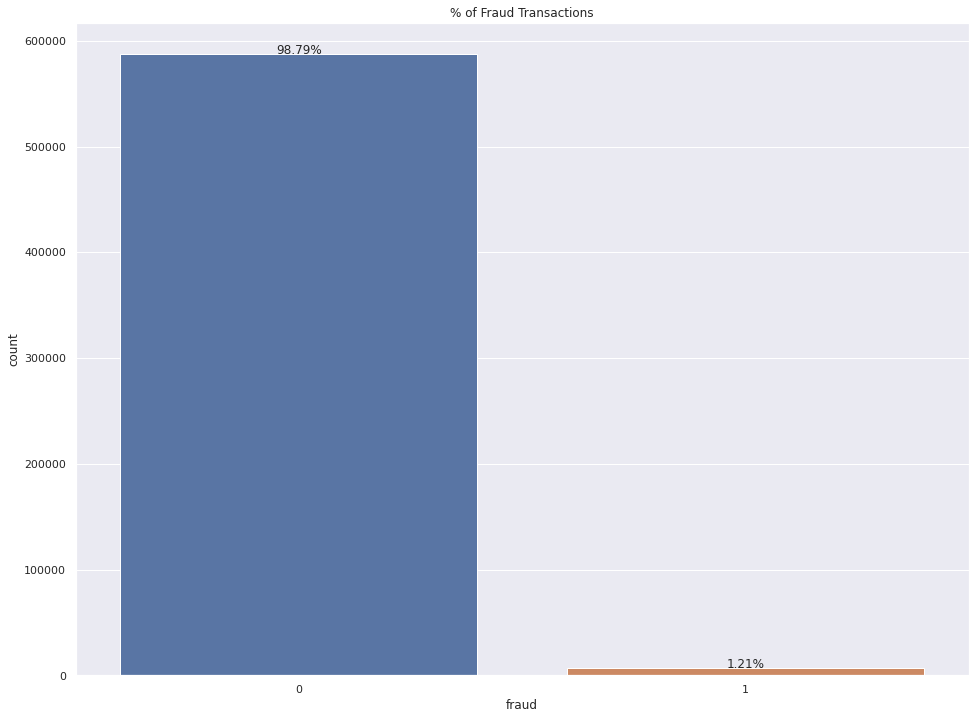

In [ ]:
countplot_viz(fraud, 'fraud', title = '% of Fraud Transactions')

###### CATEGORY

**Insight** : Main cagtegory where most of the transactions occur is **Transportation**

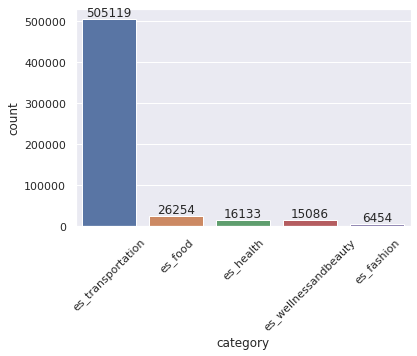

In [ ]:
ax = sns.countplot(x=fraud['category'],
                   order=fraud['category'].value_counts(ascending=False)[:5].index);

abs_values = fraud['category'].value_counts(ascending=False)[:5].values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=45)

sns.set_theme(style="darkgrid")

Finding out the categories where most of the fraud transcations are happening

In [ ]:
fraud_category = fraud.groupby(['category','fraud']).size().unstack()
fraud_category_top5 = fraud_category.sort_values(by=1, ascending=False)

In [ ]:
fraud_category_top5 = fraud_category_top5 [:5]

Top 5 categories where the fraud transactions are the highest are the followig:

In [ ]:
fraud_category_top5

fraud,0,1
category,,
es_sportsandtoys,2020.0,1982.0
es_health,14437.0,1696.0
es_wellnessandbeauty,14368.0,718.0
es_travel,150.0,578.0
es_hotelservices,1196.0,548.0


% of Fraud in these Top 5 categories

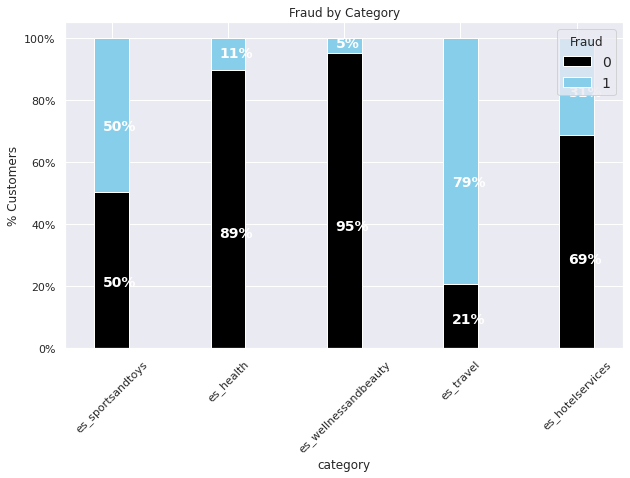

In [ ]:
ax = (fraud_category_top5.T*100.0 / fraud_category_top5.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = ['#000000','#87CEEB'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Fraud')
ax.set_ylabel('% Customers')
ax.set_title('Fraud by Category')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
    plt.xticks(rotation=45)

##### MERCHANT

Merchant distribution (Top 5) with highest number of transactions

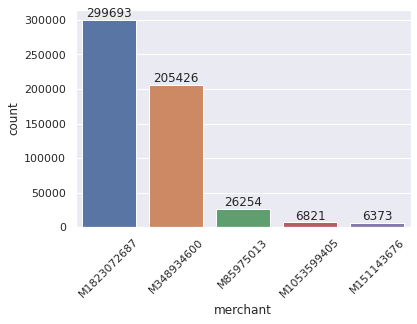

In [ ]:
ax = sns.countplot(x=fraud['merchant'],
                   order=fraud['merchant'].value_counts(ascending=False)[:5].index);

abs_values = fraud['merchant'].value_counts(ascending=False)[:5].values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation =45)
sns.set_theme(style="darkgrid")

#### Box plot of Amount Spent in each category

**Insight**:  Majority of the transactions occur in Travel industry

No handles with labels found to put in legend.


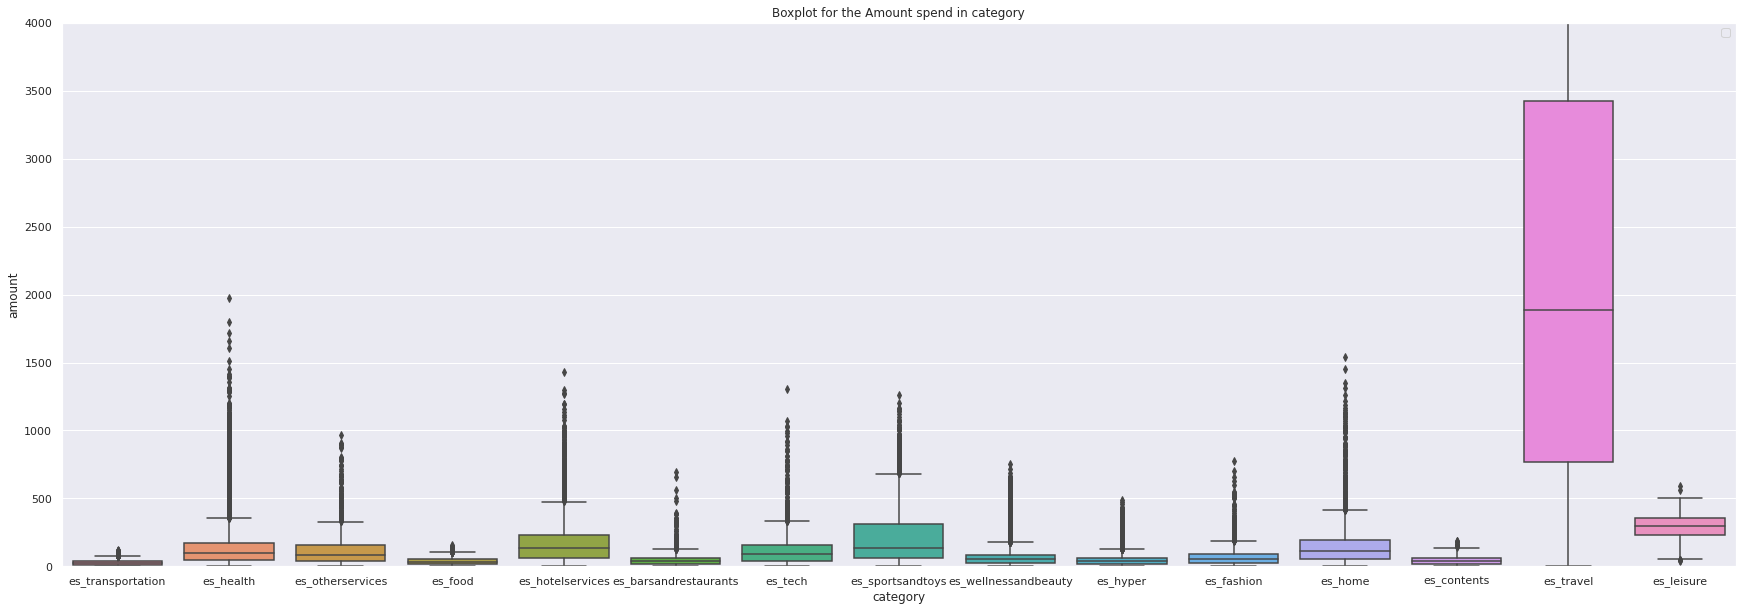

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
sns.boxplot(x=fraud.category,y=fraud.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

### Heatmap


In [ ]:
sb.heatmap(fraud.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

### SMOTE [5]

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
fraud2 = fraud.drop(['customer', 'zipcodeOri','zipMerchant' ], axis=1)

In [ ]:
fraud2['age'] = fraud2['age'].astype('string')

In [ ]:
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder() 
encoder.fit(fraud2['merchant'])
fraud2['merchant'] =  encoder.transform(fraud2['merchant'])

In [ ]:
hot_encoded_df = fraud2

hot_encoded_df = pd.get_dummies(hot_encoded_df, columns=['age', 'gender', 'category'], prefix=['age', 'gender', 'category'])


In [ ]:
preprocessed_fraud = hot_encoded_df

In [ ]:
X = preprocessed_fraud.drop(['fraud'],axis=1)
y = preprocessed_fraud['fraud']
print(X.head(),"\n")
print(y.head())

   step  merchant  amount  age_0  age_1  age_2  age_3  age_4  age_5  age_6  \
0     0        30    4.55      0      0      0      0      1      0      0   
1     0        30   39.68      0      0      1      0      0      0      0   
2     0        18   26.89      0      0      0      0      1      0      0   
3     0        30   17.25      0      0      0      1      0      0      0   
4     0        30   35.72      0      0      0      0      0      1      0   

   ...  category_es_home  category_es_hotelservices  category_es_hyper  \
0  ...                 0                          0                  0   
1  ...                 0                          0                  0   
2  ...                 0                          0                  0   
3  ...                 0                          0                  0   
4  ...                 0                          0                  0   

   category_es_leisure  category_es_otherservices  category_es_sportsandtoys  \
0     

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X.astype('float'), y.astype('int'))

y_res = pd.DataFrame(y_res)
print(y_res.value_counts())

fraud
0        587443
1        587443
dtype: int64


In [ ]:
X_res

,step,merchant,amount,age_0,age_1,age_2,age_3,age_4,age_5,age_6,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0.000000,30.000000,4.550000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000
1,0.000000,30.000000,39.680000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000
2,0.000000,18.000000,26.890000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000
3,0.000000,30.000000,17.250000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000
4,0.000000,30.000000,35.720000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174881,155.690469,3.000000,331.048391,0.0,0.0,0.690469,0.309531,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1174882,39.565751,2.427625,314.542603,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.427625,0.0,0.000000,0.0,0.0,0.0,0.572375
1174883,84.129978,19.830199,593.350432,0.0,0.0,0.870022,0.000000,0.129978,0.0,0.000000,...,0.0,0.870022,0.000000,0.000000,0.0,0.129978,0.0,0.0,0.0,0.000000
1174884,28.000000,42.000000,331.152123,0.0,0.0,0.000000,0.655808,0.344192,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000


In [ ]:
all_cols_except_amount = ['step', 'merchant', 'age_0', 'age_1', 'age_2', 'age_3',
       'age_4', 'age_5', 'age_6', 'age_U', 'gender_E', 'gender_F', 'gender_M',
       'gender_U', 'category_es_barsandrestaurants', 'category_es_contents',
       'category_es_fashion', 'category_es_food', 'category_es_health',
       'category_es_home', 'category_es_hotelservices', 'category_es_hyper',
       'category_es_leisure', 'category_es_otherservices',
       'category_es_sportsandtoys', 'category_es_tech',
       'category_es_transportation', 'category_es_travel',
       'category_es_wellnessandbeauty']
      

In [ ]:
final_ds= X_res.iloc[:, X_res.columns!='amount'].apply(lambda x: x.astype('int'))
final_ds['amount'] = X_res['amount']

In [ ]:
final_ds.columns = final_ds.columns.str.replace("'", '')
X.columns = X.columns.str.replace("'", '')

# Logistic Regression [4]

#### Recursive Feature Elimination

Recursive feature elimination is a feature selection technique that selects the features recursively considering smaller and smaller sets of features.

In [ ]:
final_ds.columns.values 

array(['step', 'merchant', 'age_0', 'age_1', 'age_2', 'age_3', 'age_4',
       'age_5', 'age_6', 'age_U', 'gender_E', 'gender_F', 'gender_M',
       'gender_U', 'category_es_barsandrestaurants',
       'category_es_contents', 'category_es_fashion', 'category_es_food',
       'category_es_health', 'category_es_home',
       'category_es_hotelservices', 'category_es_hyper',
       'category_es_leisure', 'category_es_otherservices',
       'category_es_sportsandtoys', 'category_es_tech',
       'category_es_transportation', 'category_es_travel',
       'category_es_wellnessandbeauty', 'amount'], dtype=object)

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg)


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: Int64

In [ ]:
X

,step,merchant,amount,age_0,age_1,age_2,age_3,age_4,age_5,age_6,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0,30,4.55,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,30,39.68,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,18,26.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,30,17.25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,30,35.72,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,18,20.53,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
594639,179,18,50.73,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
594640,179,31,22.44,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594641,179,18,14.46,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
 y=y.astype('int')

In [ ]:
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
 False False  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True]
[16 13 14 10  7 12  9 11  8  5  4  1  2  6  1  1  1  1  1  3 15  1  1  1
  1  1  1  1  1  1]


In [ ]:
X.columns[rfe.support_]

Index(['gender_E', 'gender_U', 'category_es_barsandrestaurants',
       'category_es_contents', 'category_es_fashion', 'category_es_food',
       'category_es_hotelservices', 'category_es_hyper', 'category_es_leisure',
       'category_es_otherservices', 'category_es_sportsandtoys',
       'category_es_tech', 'category_es_transportation', 'category_es_travel',
       'category_es_wellnessandbeauty'],
      dtype='object')

Using recursive feature selection technique, we have eliminated 15 out of 30 features. The selected 15 features are the most relevant or important features that will be used as input variables for the logistic regression model.

#### Before SMOTE oversampling

#### Training the model

Below is the implementation and performance of the logistic regression model on the original data (without SMOTE oversampling).

In [ ]:
# splitting the dataset into train and test set in the ratio 80:20.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[X.columns[rfe.support_]], y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (475714, 15)
y_train shape: (475714,)
X_test shape: (118929, 15)
y_test shape: (118929,)


In [ ]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit(method ='newton')
print(result.summary())

         Current function value: 0.039418
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               475714
Model:                          Logit   Df Residuals:                   475699
Method:                           MLE   Df Model:                           14
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                  0.3999
Time:                        16:41:37   Log-Likelihood:                -18752.
converged:                      False   LL-Null:                       -31250.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
gender_E                          -2.3621      0.489     -4.835      0.000      -3.320      -1.405
gender_U                           4.9379      0.586      8.426      0.

The table above is a summary table of all the features obtained using the summary function of the statsmodels module.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
logmodel = LogisticRegression(max_iter=3000)
logmodel.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=3000)

In [ ]:
X_train

,gender_E,gender_U,category_es_barsandrestaurants,category_es_contents,category_es_fashion,category_es_food,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
210963,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
494705,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
44110,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
571604,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
229915,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
259178,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
365838,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
131932,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_train

210963    0
494705    0
44110     0
571604    0
229915    0
         ..
110268    0
259178    0
365838    0
131932    0
121958    0
Name: fraud, Length: 475714, dtype: int64

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: int64

In [ ]:
y_pred = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


[[117477     35]
 [  1215    202]]


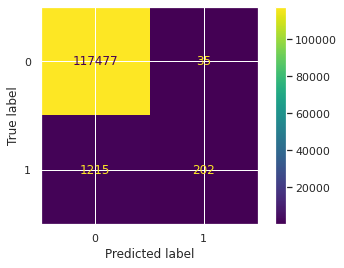

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plot_confusion_matrix(logmodel, X_test, y_test)  
plt.show()

The above consfusion matrix shows that the model made 117477 positive classifications and 202 negative classifications correctly, with 99% accuracy before SMOTE oversampling.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    117512
           1       0.85      0.14      0.24      1417

    accuracy                           0.99    118929
   macro avg       0.92      0.57      0.62    118929
weighted avg       0.99      0.99      0.99    118929



####  Receiver Operating Characteristic (ROC) Curve

ROC curve is a useful tool predicting the probability of a binary outcome. It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis). 

Area under the curve (AUC) represents the degree or measure of separability. It signifies how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting fraudulent transactions as fraudulent and non-fraudulent transaction as non-fraudulent.

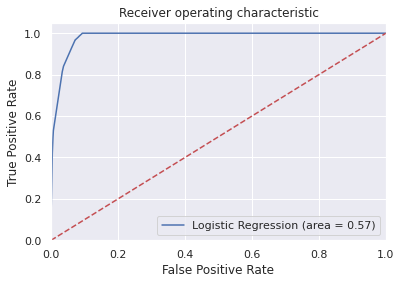

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds_ = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### Learning Curve

Text(0, 0.5, 'Misclassification error before smote')

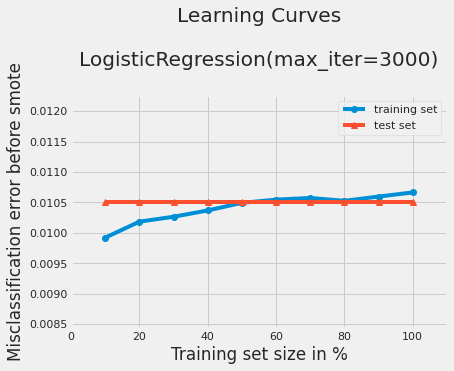

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train.astype('int'), y_train.astype('int'), X_test.astype('int'), y_test.astype('int'), logmodel)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error before smote")

#### Hyperparameter tuning before SMOTE

For hyperparameter tuning before SMOTE oversampling, we used RandomizedSearchCV, which goes through a random fixed number of hyperparameter settings instead of going through all of them. This approach reduces unnecessary computation. 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defining the random search
randomized = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
random_search = RandomizedSearchCV(estimator=logmodel, param_distributions=randomized, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
random_result = random_search.fit(X,y)

# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.994739 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.994459 (0.000127) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
0.994733 (0.000142) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.994330 (0.000118) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}
0.994680 (0.000145) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.994737 (0.000151) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.994736 (0.000146) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.994735 (0.000148) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.994739 (0.000146) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.994716 (0.000152) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
0.994717 (0.000147) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}


In [ ]:
logistic_before = 0.994739

#### After SMOTE oversampling

Below is the implementation and performance of the logistic regression model on the oversampled dataset (after SMOTE oversampling).

#### Training the model

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(final_ds[final_ds.columns[rfe.support_]], y_res, test_size=0.2, random_state=42)
print('X_train shape:', X_train_sm.shape)
print('y_train shape:', y_train_sm.shape)
print('X_test shape:', X_test_sm.shape)
print('y_test shape:', y_test_sm.shape)

X_train shape: (939908, 15)
y_train shape: (939908, 1)
X_test shape: (234978, 15)
y_test shape: (234978, 1)


In [ ]:
logit_model_1 = sm.Logit(y_train_sm, X_train_sm)
result_1 = logit_model_1.fit(method ='newton')
print(result_1.summary())

         Current function value: 0.087832
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               939908
Model:                          Logit   Df Residuals:                   939893
Method:                           MLE   Df Model:                           14
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                  0.8733
Time:                        15:21:17   Log-Likelihood:                -82554.
converged:                      False   LL-Null:                   -6.5149e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
gender_F                           0.5016      0.012     43.066      0.000       0.479       0.524
category_es_barsandrestaurants    -2.8076      0.035    -80.399      0.

The table above is a summary table of all the features obtained using the summary function of the statsmodels module.

In [ ]:
logmodel_1 = LogisticRegression(max_iter=3000)
logmodel_1.fit(X_train_sm, y_train_sm.values.ravel())

LogisticRegression(max_iter=3000)

In [ ]:
y_pred_1 = logmodel_1.predict(X_test_sm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel_1.score(X_test_sm, y_test_sm)))

Accuracy of logistic regression classifier on test set: 0.97


[[112576   5049]
 [  2463 114890]]


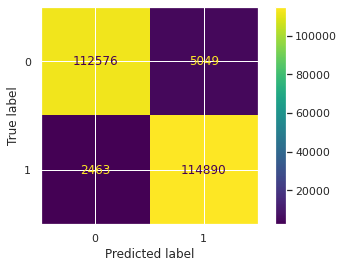

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_sm, y_pred_1)
print(confusion_matrix)
plot_confusion_matrix(logmodel_1, X_test_sm, y_test_sm)  
plt.show()

The above consfusion matrix shows that the model made 112576 positive classifications and 114890 negative classifications correctly, with 97% accuracy after SMOTE oversampling.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_sm, y_pred_1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    117625
           1       0.96      0.98      0.97    117353

    accuracy                           0.97    234978
   macro avg       0.97      0.97      0.97    234978
weighted avg       0.97      0.97      0.97    234978



#### Receiver Operating Characteristic (ROC) Curve

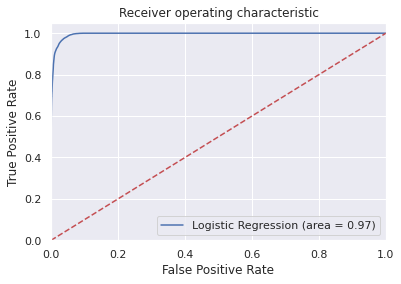

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_sm, y_pred_1)
fpr, tpr, thresholds_ = roc_curve(y_test_sm, logmodel_1.predict_proba(X_test_sm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

#### Learning Curve

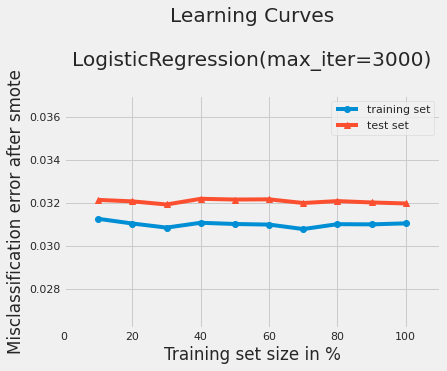

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train_sm.astype('int'), y_train_sm['fraud'].astype('int'), X_test_sm.astype('int'), y_test_sm['fraud'].astype('int'), logmodel_1)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error after smote")
plt.show()

### Hyperparameter tuning after SMOTE 

For Hyperparameter tuning after SMOTE oversampling, we  performed HalvingRandomSearchCV to find the best parameters, as it performs successive halving of the new class and training is performed on the subsets of data, rather than on all the data. Since the size of the dataset increased after oversampling, we preferred HalvingRandomSearchCV over RandomizedSearchCV for hyperparameter tuning.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defining the random search
randomized = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
random_search = HalvingRandomSearchCV(estimator=logmodel_1, param_distributions=randomized, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
random_result = random_search.fit(final_ds,y_res)

# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975118 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.946465 (0.054942) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.946465 (0.054942) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.946465 (0.054942) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.946465 (0.064191) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.946465 (0.064191) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.958586 (0.044335) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.929293 (0.081202) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.929293 (0.081202) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
0.941414 (0.069679) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.910606 (0.086872) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
0.910606 (0.086872) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.904545 (0.069090) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.910606 (0.086872) with: {

In [ ]:
logistic_after = 0.975118

# Decision Tree [3]

Decision tree classifiers are superised learning methods used to classify nodes inside a tree. Each node basically is used to split the data conditionally until the tree finds its pure nodes. 

***Before SMOTE Oversampling***

**A basic decision tree model**

Feature selection is the technique for limiting the input to the model utilizing only necessary data and removing noise from data. KBest allows automatic selection of features for classification model.

In [ ]:
#Feature selection for building a basic classification tree
from sklearn.feature_selection import SelectKBest, f_classif
selectFeatures = SelectKBest(f_classif, k=6)
selectFeatures.fit_transform(X,y.astype('int'))
filter = selectFeatures.get_support()
features = X.columns
print(features[filter])

Index(['amount', 'category_es_hotelservices', 'category_es_leisure',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel'],
      dtype='object')


We will use the following features to train the basic classification tree model.

In [ ]:
new_X = X[['amount', 'category_es_hotelservices', 'category_es_leisure',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel']].copy()

In [ ]:
#splitting the train data and test data
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=1)

In [ ]:
#Building the basic classification model
from sklearn import tree
dt_basic_model = tree.DecisionTreeClassifier()
dt_basic_model = dt_basic_model.fit(X_train, y_train.astype('int'))
dt_basic_predicted_value = dt_basic_model.predict(X_test)

For evaluating the model we have used accuracy

In [ ]:
print (metrics.accuracy_score(y_test.astype('int'), dt_basic_predicted_value))

0.992522128110408


Text(0, 0.5, 'Misclassification error before smote')

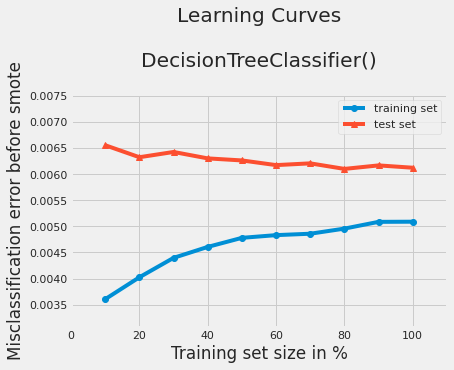

In [ ]:
#Plot learning curve for misclassification data before smote
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train.astype('int'), y_train.astype('int'), X_test.astype('int'), y_test.astype('int'),dt_basic_model)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error before smote")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

**Hyperparameter tuning on the decision tree using Gini**

Gini calculates the information gain of features by itself and uses the best features to build the model. This will help in determining the best split for data.

In [ ]:
# splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Building the model using Gini
from sklearn.tree import DecisionTreeClassifier
dt_gini_model = DecisionTreeClassifier(criterion = "gini",random_state = 150,max_depth=7, min_samples_leaf=7)
dt_gini_model=dt_gini_model.fit(X_train, y_train.astype('int'))

In [ ]:
#Predicting the model using the accuracy
predicted_value_tree = dt_gini_model.predict(X_test)
print (metrics.accuracy_score(y_test.astype('int'), predicted_value_tree))

0.9954650686966416


Text(0, 0.5, 'Misclassification error for Gini')

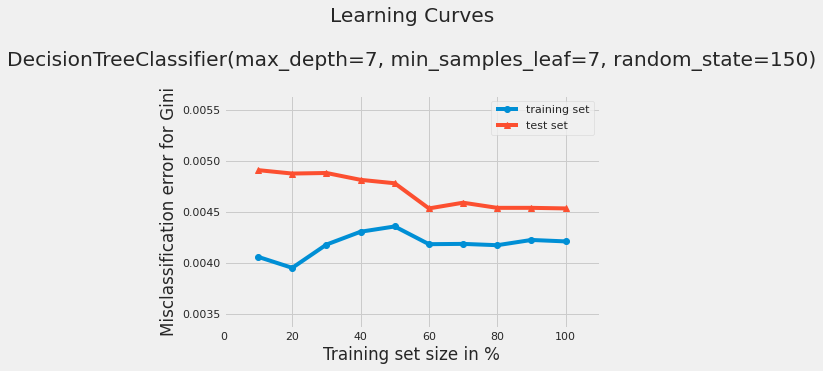

In [ ]:
#Plot learning curve for misclassification data before smote
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train.astype('int'), y_train.astype('int'), X_test.astype('int'), y_test.astype('int'),dt_gini_model)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error for Gini")

**Hyperparameter tuning on the decision tree using Entropy**

Entropy is a metric used in information theory to gauge how pure or uncertain a set of observations is. We will tune the model with entropy

In [ ]:
#Decision tree classifier using the entropy
decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 5, min_samples_leaf = 5)

In [ ]:
#Fitting the model into data
decision_tree_entropy.fit(X_train, y_train.astype('int'))

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [ ]:
predicted_dt_entropy = decision_tree_entropy.predict(X_test)

In [ ]:
#Measuring accuray for the model
print (metrics.accuracy_score(y_test.astype('int'), predicted_dt_entropy))

0.9947307349503623


In [ ]:
decision_tree_before = metrics.accuracy_score(y_test.astype('int'), predicted_dt_entropy)

Text(0, 0.5, 'Misclassification error for Entropy')

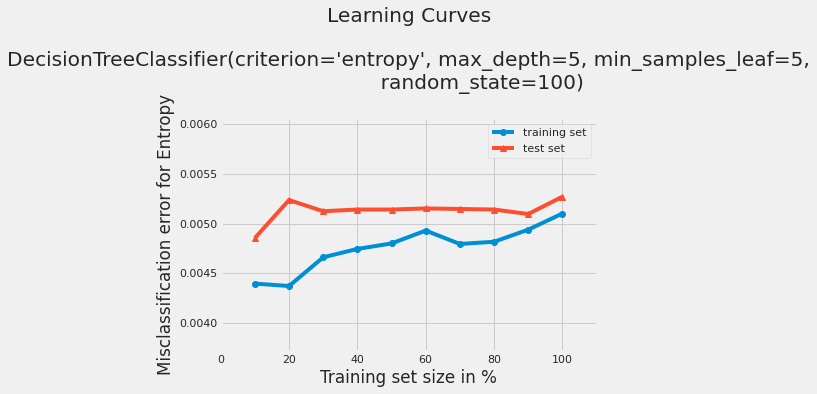

In [ ]:
#Plot learning curve for misclassification data before smote
plot_learning_curves(X_train.astype('int'), y_train.astype('int'), X_test.astype('int'), y_test.astype('int'),decision_tree_entropy)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error for Entropy")

***After SMOTE Oversampling***

*Basic decision tree*

In [ ]:
#Select features from the smote data
new_smote_X = final_ds[['amount', 'category_es_hotelservices', 'category_es_leisure',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel']].copy()

In [ ]:
#Building the model using smote data
X_train_smote, X_test_smote, t_train_smote, t_test_smote = train_test_split(new_smote_X, y_res, test_size=0.3, random_state=1)
dt_basic_smote_model = tree.DecisionTreeClassifier()
dt_basic_smote_model = dt_basic_smote_model.fit(X_train_smote, t_train_smote.astype('int'))
predicted_value_after_smote = dt_basic_smote_model.predict(X_test_smote)

In [ ]:
#Measuring the accuracy
print (metrics.accuracy_score(t_test_smote.astype('int'), predicted_value_after_smote))

0.9689643823801445


Text(0, 0.5, 'Misclassification error after smote')

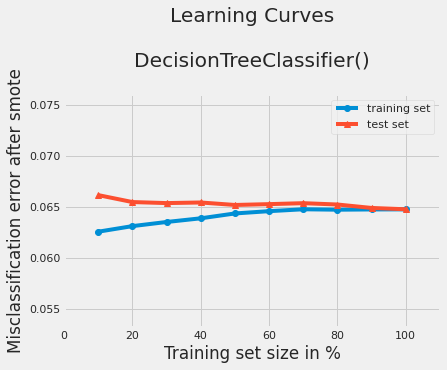

In [ ]:
plot_learning_curves(X_train_smote.astype('int'), t_train_smote['fraud'].astype('int'), X_test_smote.astype('int'), t_test_smote['fraud'].astype('int'),dt_basic_smote_model)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error after smote")

**Hyperparameter tuning using gini**

In [ ]:
#Split the train and test data after smote for gini
X_train_smote, X_test_smote, t_train_smote, t_test_smote = train_test_split(final_ds, y_res, test_size=0.3, random_state=1)

In [ ]:
#Build the decision tree using Gini
from sklearn.tree import DecisionTreeClassifier
dt_gini_smote_model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=12, min_samples_leaf=5)
dt_gini_smote_model=dt_gini_smote_model.fit(X_train_smote, t_train_smote.astype('int'))

In [ ]:
#Predict the model and test for accuracy
predicted_value_tree_smote = dt_gini_smote_model.predict(X_test_smote)
print (metrics.accuracy_score(t_test_smote.astype('int'), predicted_value_tree_smote))

0.989749365896285


Text(0, 0.5, 'Misclassification error for Gini')

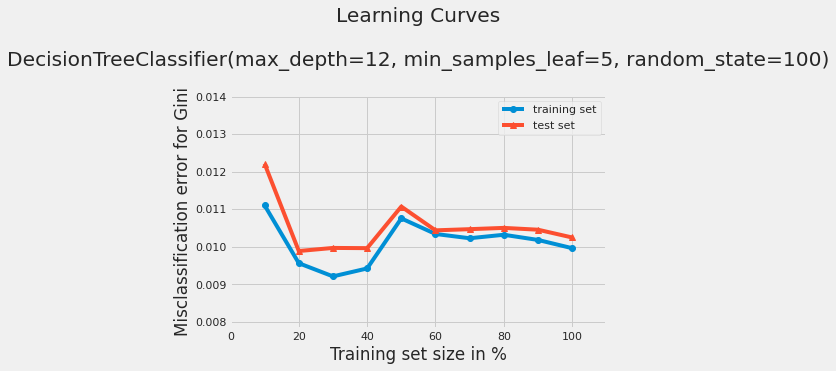

In [ ]:
plot_learning_curves(X_train_smote.astype('int'), t_train_smote['fraud'].astype('int'), X_test_smote.astype('int'), t_test_smote['fraud'].astype('int'),dt_gini_smote_model)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error for Gini")

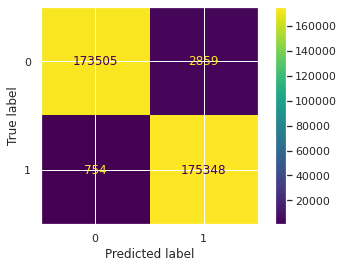

In [ ]:
#Confusion matrix for Gini after smote
plot_confusion_matrix(estimator = dt_gini_smote_model, X = X_test_smote, y_true = t_test_smote)

**Hyperparameter tuning using entropy**

In [ ]:
# Create a decision tree classifier object for entropy
dt_entropy_model_smote = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 12, min_samples_leaf = 5)

In [ ]:
# Fit the model into the data
dt_entropy_model_smote.fit(X_train_smote, t_train_smote.astype('int'))

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5,
                       random_state=100)

In [ ]:
#Predict the model and test for accuracy
predicted_dt_entropy_smote = dt_entropy_model_smote.predict(X_test_smote)
print (metrics.accuracy_score(t_test_smote.astype('int'), predicted_dt_entropy_smote))

0.9880215396662373


In [ ]:
decision_tree_after = metrics.accuracy_score(t_test_smote.astype('int'), predicted_dt_entropy_smote)

Text(0, 0.5, 'Misclassification error for Entropy')

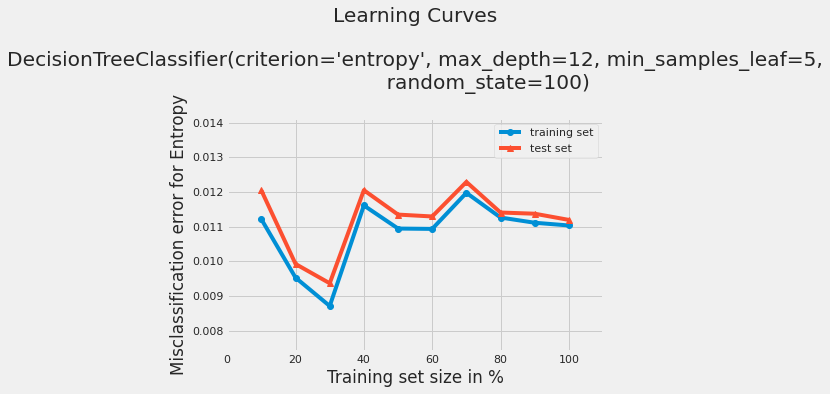

In [ ]:
plot_learning_curves(X_train_smote.astype('int'), t_train_smote['fraud'].astype('int'), X_test_smote.astype('int'), t_test_smote['fraud'].astype('int'),dt_entropy_model_smote)
plt.xlabel("Training set size in %")
plt.ylabel("Misclassification error for Entropy")

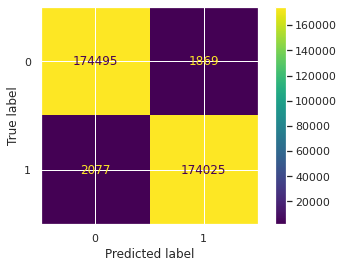

In [ ]:
plot_confusion_matrix(estimator = dt_entropy_model_smote, X = X_test_smote, y_true = t_test_smote)


# Random Forest [2]
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

Random forest algorithm involves multiple parameters that are used while training the algorithm. These parameters make the training easier and yeilds output that make the accuracy of our model better. These parameters can be tuned using hyperparameter tuning, that makes the model's learning curve better. 


## Before SMOTE Oversampling
Using the baseline version of our fraud data, we will implement random forest algorithm.

The results achieved from this iteration will define our baseline model.

In [ ]:
#Seggregating our dataset from target variable by removing it from the dataset.

#Storing the target variable 
labels = np.array(fraud['fraud'])

df_update_list = list(X.columns)

df_updated = np.array(X)

We will split our data into training, testing and validation dataset in the ratio of 40:30:30.

In [ ]:
#Dividing the dataset into training, testing and validation
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(df_updated, y,train_size = 0.4)

In [ ]:
#Splitting the remainder data into equal split size
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size = 0.5)

Feature Selection Method - Using k-best algorithm with a parameter of 6 as the number of best features to be considered.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selectFeatures = SelectKBest(f_classif, k=6)
selectFeatures.fit_transform(X,y.astype('int'))
filter = selectFeatures.get_support()
features = X.columns
print(features[filter])

Index(['amount', 'category_es_hotelservices', 'category_es_leisure',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel'],
      dtype='object')


Based on the top features above, we will use only those features to perform Random Forest Algorithm.

In [ ]:
#Importing the model we are using 
from sklearn.ensemble import RandomForestClassifier

# Random forest with only the two three important variables
rf_most_important = RandomForestClassifier()
#Pinning the important indices
important_indices = [df_update_list.index('amount'), df_update_list.index("category_es_sportsandtoys"), df_update_list.index("category_es_transportation"), df_update_list.index("category_es_travel"), df_update_list.index("category_es_hotelservices"), df_update_list.index("category_es_leisure")]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]
valid_important = X_valid[:, important_indices]

Fitting the model to training data

In [ ]:
#Fitting the model to the data
rf_train = rf_most_important.fit(train_important.astype('int'), Y_train.astype('int'))

From the above fitted model on selected features, we will implement our algorithm to predict values on testing data set.

We will then compute the accuracy score of our model on training, testing and validation dataset. 

In [ ]:
#Once the model has been trained to learn the relationship between input and target variables
#We can use it to predict on the test features
prediction = rf_train.predict(test_important[:])

train_score = rf_most_important.score(train_important.astype('int'), Y_train.astype('int'))
test_score = rf_most_important.score(test_important.astype('int'), Y_test.astype('int'))
valid_score = rf_most_important.score(valid_important.astype('int'), Y_valid.astype('int'))

#Printing the accuracy scores of training, testing and validation data
print ('Training data :', train_score)
print('Testing data :', test_score)
print('Validating data :', valid_score)

Training data : 0.9355213488979772
Testing data : 0.9346632015570296
Validating data : 0.9350859373670084


Based on the above output, we are getting an accuracy of 93.4% on testing data.

Below is the graph for all the three-tiers of data- training, testing and validation.

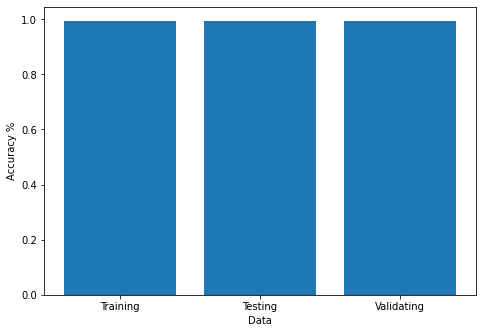

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
scores = [train_score,test_score,valid_score]
dataset = ['Training', 'Testing', 'Validating'] 
ax.bar(dataset, scores)
plt.xlabel('Data')
plt.ylabel('Accuracy %')
plt.show()

Hyperparamter tuning before SMOTE 

We will then perform hyperparamter tuning using two parameters - 

i) n_estimators 

ii) max_depth 

These parameters were chosen by performing the best combination of results.

In [ ]:
#Adding parameters in the classifier algorithm
rf_hyptun = RandomForestClassifier(n_estimators = 500, max_depth = 500)
train_model = rf_hyptun.fit(train_important.astype('int'), Y_train.astype('int'))
pred_hyptun = train_model.predict(test_important.astype('int'))

#Evaluating training, testing and validation scores
train_score_hyptun = rf_hyptun.score(train_important.astype('int'), Y_train.astype('int'))
test_score_hyptun = rf_hyptun.score(test_important.astype('int'), Y_test.astype('int'))
valid_score_hyptun = rf_hyptun.score(valid_important.astype('int'), Y_valid.astype('int'))

#Printing the accuracy scores of training, testing and validation data
print ('Training data :', train_score_hyptun)
print('Testing data :', test_score_hyptun)
print('Validating data :', valid_score_hyptun)

Training data : 0.935525604633645
Testing data : 0.9344674379940193
Validating data : 0.9349071967225208


In [ ]:
preprocessed_fraud.columns = preprocessed_fraud.columns.str.replace("'", '')

### Confusion Matrix 

We have plotted a confusion matrix of classification in values based on the implementation of our model.

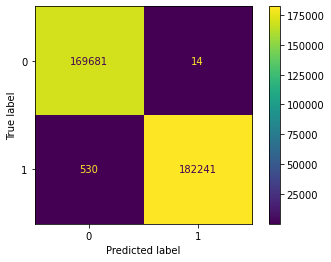

In [ ]:
plot_confusion_matrix(estimator = rf_hyptun, X = test_important.astype('int'), y_true = pred_hyptun)

## Learning curve 
Learning curve plots the accuracy based on the estimators.


In [ ]:
from sklearn.metrics import accuracy_score
acc_train = []
features = ['amount', 'category_es_hotelservices', 'category_es_leisure','category_es_sportsandtoys', 'category_es_transportation','category_es_travel']
acc_test = []

for estimators in range(1, 20):

  model_rf = RandomForestClassifier(n_estimators=estimators , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 800)

  # train the model using the training set

  model_rf.fit(X_train.astype('int'), Y_train.astype('int'))

  prediction_train = model_rf.predict(X_train)

  acc_train.append(round(accuracy_score(Y_train.astype(int), prediction_train.astype(int))*100, 2))

  prediction_test = model_rf.predict(X_test)

  acc_test.append(round(accuracy_score(Y_test.astype(int), prediction_test.astype(int))*100, 2))

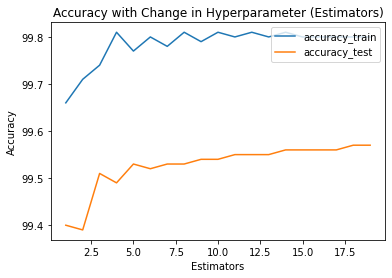

In [ ]:
plt.plot(range(1, 20), acc_train, label='accuracy_train')
plt.plot(range(1, 20), acc_test, label='accuracy_test')
plt.legend(loc='upper right')
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy with Change in Hyperparameter (Estimators)")
plt.show()


## After SMOTE Oversampling

In [ ]:
#Seggregating our dataset from target variable by removing it from the dataset.
#Storing the target variable 
labels = np.array(y_res)

df_update_list = list(final_ds.columns)

df_updated = np.array(final_ds)

Splitting data into validation, testing and training in a ratio of 40:30:30

In [ ]:
#Dividing the dataset into training, testing and validation
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(df_updated, labels,train_size = 0.4)

In [ ]:
#Splitting the remainder data into equal split size
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size = 0.5)

In [ ]:
#Importing the model we are using 
from sklearn.ensemble import RandomForestClassifier

# Random forest with only the two three important variables
rf_most_important = RandomForestClassifier()
#Pinning the important indices
important_indices = [df_update_list.index('amount'), df_update_list.index("category_es_sportsandtoys"), df_update_list.index("category_es_transportation"), df_update_list.index("category_es_travel")]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]
valid_important = X_valid[:, important_indices]


In [ ]:
#Fitting the model to the data
rf_train = rf_most_important.fit(train_important[:], Y_train)

#Once the model has been trained to learn the relationship between input and target variables
#We can use it to predict on the test features
prediction = rf_train.predict(test_important[:])

train_score = rf_most_important.score(train_important[:], Y_train)
test_score = rf_most_important.score(test_important[:], Y_test)
valid_score = rf_most_important.score(valid_important[:], Y_valid)

#Printing the accuracy scores of training, testing and validation data
print ('Training data :', train_score)
print('Testing data :', test_score)
print('Validating data :', valid_score)

Training data : 0.9990403316069232
Testing data : 0.9575675384292386
Validating data : 0.9571221053945629


As we can the accuracy score goes up to 95.7% after performing SMOTE oversampling.

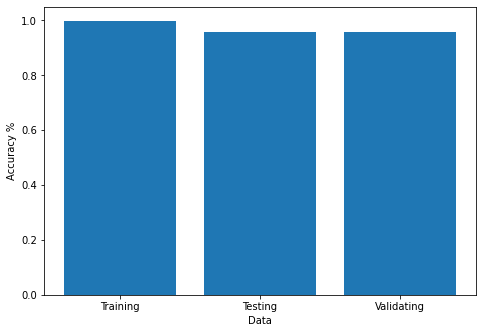

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
scores = [train_score,test_score,valid_score]
dataset = ['Training', 'Testing', 'Validating'] 
ax.bar(dataset, scores)
plt.xlabel('Data')
plt.ylabel('Accuracy %')
plt.show()

Hyperparameter tuning after SMOTE

In [ ]:
#Adding parameters in the classifier algorithm
rf_hyptun = RandomForestClassifier(max_depth = 10000, n_estimators = 30)
train_model = rf_hyptun.fit(train_important.astype('int'), Y_train.astype('int'))
pred_hyptun = train_model.predict(test_important.astype('int'))

#Evaluating training, testing and validation scores
# train_score_hyptun = rf_hyptun.score(train_important.astype('int'), Y_train.astype('int'))
test_score_hyptun = rf_hyptun.score(test_important.astype('int'), Y_test.astype('int'))
# valid_score_hyptun = rf_hyptun.score(valid_important.astype('int'), Y_valid.astype('int'))

#Printing the accuracy scores of training, testing and validation data
print ('Training data :', train_score_hyptun)
print('Testing data :', test_score_hyptun)
print('Validating data :', valid_score_hyptun)

Training data : 0.9347361656672781
Testing data : 0.9347114331595104
Validating data : 0.9349327311003047


After hyperparameter tuning our accuracy is 93.7%. It has dropped down as compared to before oversampling. This is an expected behavior as the redundant dataset make the model's prediction weak. 

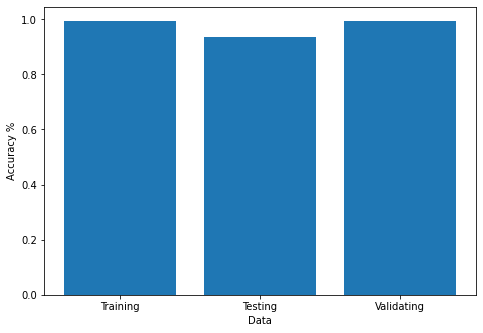

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
scores = [train_score_hyptun,test_score_hyptun,valid_score_hyptun]
dataset = ['Training', 'Testing', 'Validating'] 
ax.bar(dataset, scores)
plt.xlabel('Data')
plt.ylabel('Accuracy %')
plt.show()

## Confusion Matrix

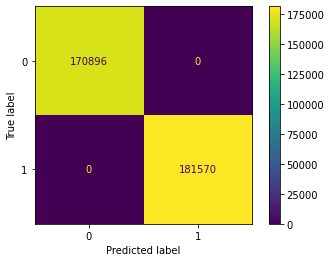

In [ ]:
 from sklearn.metrics import confusion_matrix
 plot_confusion_matrix(estimator = rf_hyptun, X = test_important.astype('int'), y_true = pred_hyptun)

## Learning Curve

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = []
features = ['amount', 'category_es_hotelservices', 'category_es_leisure','category_es_sportsandtoys', 'category_es_transportation','category_es_travel']
acc_test = []

for estimators in range(1, 20):

  model_rf = RandomForestClassifier(n_estimators=estimators , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 800)

  # train the model using the training set

  model_rf.fit(X_train.astype('int'), Y_train.astype('int'))

  prediction_train = model_rf.predict(X_train)

  acc_train.append(round(accuracy_score(Y_train.astype(int), prediction_train.astype(int))*100, 2))

  prediction_test = model_rf.predict(X_test)

  acc_test.append(round(accuracy_score(Y_test.astype(int), prediction_test.astype(int))*100, 2))

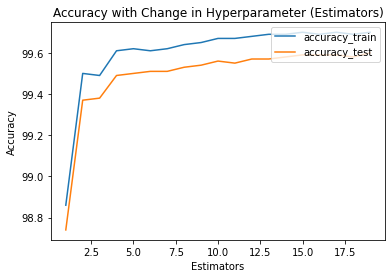

In [ ]:
plt.plot(range(1, 20), acc_train, label='accuracy_train')
plt.plot(range(1, 20), acc_test, label='accuracy_test')
plt.legend(loc='upper right')
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy with Change in Hyperparameter (Estimators)")
plt.show()


# Comparison of Models


### Before SMOTE

In [ ]:
all_models_before =[logistic_before*100.00, decision_tree_before*100.00, random_forest_before*100.00]

In [ ]:
all_models_after = [logistic_after*100.00,decision_tree_after*100.00, random_forest_after*100.00]

Before SMOTE Logistic Regression performs the best with 99.4739 %

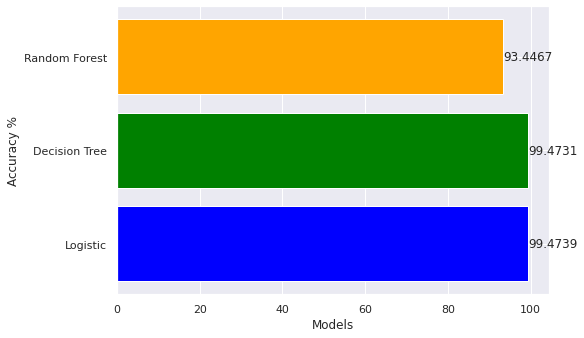

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

dataset = ['Logistic','Decision Tree','Random Forest']
ax.barh(dataset,all_models_before, color = ['blue', 'green', 'orange'])
abs_values_before = np.round(all_models_before,4)
ax.bar_label(container=ax.containers[0], labels=abs_values_before)
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.show()

After SMOTE Decision Tree performs the best with 98.8 %

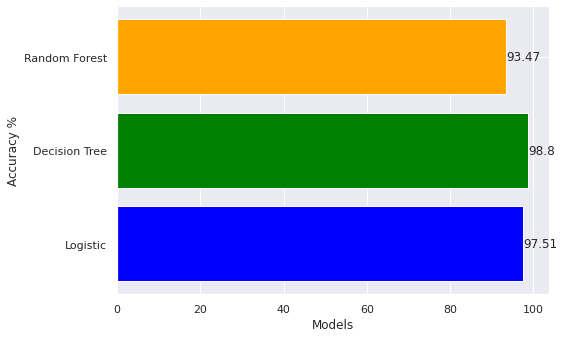

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1],)

dataset = ['Logistic','Decision Tree','Random Forest']
ax.barh(dataset,all_models_after, color = ['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy %')
abs_values = np.round(all_models_after,2)
ax.bar_label(container=ax.containers[0], labels=abs_values)

sns.set_theme(style="darkgrid")
plt.show()

## STATISTICAL SIGNIFICANCE TEST

Running Paired T test for checking the statisitical significance

Null Hypothesis:- Both the models perform equally well on the dataset

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=dt_basic_model,
                          estimator2=rf_hyptun,
                          X=final_ds, y=y_res,
                          scoring= 'neg_mean_squared_error',
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %5f' % p)

if p<=0.05:
    print('Null Hypothesis is rejected and we can conclude that both models do not perform equally well')
else:
    print('We cannot reject the null hypothesis since the p-value (p<0.001) is greater than 0.05.')

t statistic: -14.695
p value: 0.000026
Null Hypothesis is rejected and we can conclude that both models do not perform equally well


## Cross Validation


### Cross Validation of Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

# validation_logistic_reg= cross_val_score(logmodel, final_ds, y_res, cv=5)
validation_logistic_reg = [0.975118*100.00, 0.98113*100.00 , 0.9412*100.00,0.9465*100.00,0.9395*100.00 ]
validation_logistic_reg

[97.51180000000001, 98.113, 94.12, 94.65, 93.95]

### Cross Validation of decision tree classifier

In [ ]:
from sklearn.model_selection import cross_val_score

validation_decision_tree =cross_val_score(dt_basic_model, final_ds, y_res, cv=5)
validation_decision_tree

array([0.01432788, 0.98099707, 0.97797005, 0.98665579, 0.99073389])

### Cross Validation of Random Forest classifier

In [ ]:
from sklearn.model_selection import cross_val_score

validation_random_forest =cross_val_score(rf_hyptun, final_ds, y_res, cv=5)
validation_random_forest

array([0.86278368, 0.99403005, 0.99368531, 0.99427385, 0.99406364])

### Box plot Comparison of Models

Box plot comparison of the cross validation done for both the models.

(92.0, 100.0)

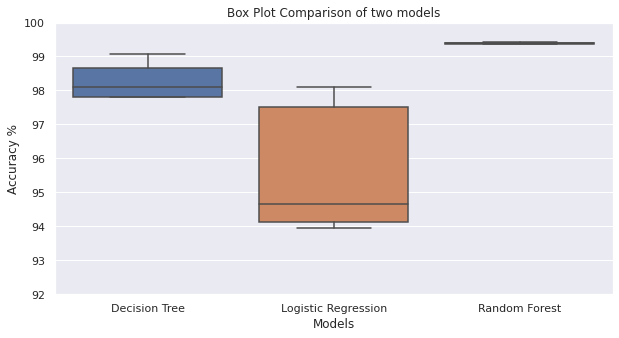

In [ ]:
all_arr = [(validation_decision_tree)*100, (validation_logistic_reg)*100, (validation_random_forest)*100]
fig = plt.figure(figsize =(10, 5))
dataset = ['Decision Tree','Logistic Regression','Random Forest']
ax=sns.boxplot(data=all_arr)
plt.xticks(np.arange(len(dataset)),dataset)
ax.set_title('Box Plot Comparison of two models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy %')
plt.ylim(92, 100)

# References 

[1] "Fraud Detection on Bank Payments", Kaggle.com, 2022. [Online]. Available: https://www.kaggle.com/code/turkayavci/fraud-detection-on-bank-payments. [Accessed: 03- Aug- 2022].

[2]"Understanding Random Forest", Medium, 2022. [Online]. Available: https://towardsdatascience.com/understanding-random-forest-58381e0602d2. [Accessed: 03- Aug- 2022].

[3]"Decision Tree Classification", Medium, 2022. [Online]. Available: https://medium.com/swlh/decision-tree-classification-de64fc4d5aac. [Accessed: 03- Aug- 2022].

[4]"LOGISTIC REGRESSION CLASSIFIER", Medium, 2022. [Online]. Available: https://towardsdatascience.com/logistic-regression-classifier-8583e0c3cf9. [Accessed: 03- Aug- 2022].

[5]J. Brownlee, "SMOTE for Imbalanced Classification with Python", Machine Learning Mastery, 2022. [Online]. Available: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. [Accessed: 03- Aug- 2022].

[6]2022. [Online]. Available: https://www.datacamp.com/blog/data-science-in-banking. [Accessed: 03- Aug- 2022].

[7]"sklearn.linear_model.LogisticRegression", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. [Accessed: 03- Aug- 2022].

[8]"sklearn.model_selection.RandomizedSearchCV", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html. [Accessed: 03- Aug- 2022].

[9] "sklearn.model_selection.HalvingRandomSearchCV", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html. [Accessed: 03- Aug- 2022].

[10]"sklearn.metrics.plot_confusion_matrix", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html. [Accessed: 03- Aug- 2022].

[11]"Recursive Feature Selection: Addition or Elimination?", Medium, 2022. [Online]. Available: https://towardsdatascience.com/recursive-feature-selection-addition-or-elimination-755e5d86a791. [Accessed: 03- Aug- 2022].

[12]Medium. 2022. Recursive Feature Selection: Addition or Elimination?. [online] Available at: <https://towardsdatascience.com/recursive-feature-selection-addition-or-elimination-755e5d86a791> [Accessed 3 August 2022].
